# Import Libraries

In [48]:
# Import relevant models
from sklearn.linear_model import SGDRegressor # this implements Elastic net regression model
from sklearn.model_selection import train_test_split # creates a training and testing split
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline


# Import SKLearn Score Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.metrics import f1_score

# Upload dataframe and inspect. 
df = pd.read_csv('Electric and Alternative Fuel Charging Stations.csv')
rows, cols = data.shape
print('The data shape is {} rows and {} columns'.format(rows, cols))
print('\nHead of the data:')
df.head()


The data shape is 70406 rows and 65 columns

Head of the data:


,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
0,CNG,Spire - Montgomery Operations Center,2951 Chestnut St,NaN,Montgomery,AL,36107,NaN,NaN,E,...,NaN,NaN,NaN,NaN,B,3600,MD,NaN,NaN,NaN
1,CNG,PS Energy - Atlanta,340 Whitehall St,"From I-7585 N, exit 91 to Central Ave, left on...",Atlanta,GA,30303,NaN,770-350-3000,E,...,NaN,NaN,NaN,NaN,Q,3600,MD,NaN,NaN,False
2,CNG,Metropolitan Atlanta Rapid Transit Authority,2424 Piedmont Rd NE,NaN,Atlanta,GA,30324,NaN,NaN,E,...,NaN,NaN,NaN,NaN,Q,3000,LD,NaN,NaN,NaN
3,CNG,United Parcel Service,270 Marvin Miller Dr,NaN,Atlanta,GA,30336,NaN,NaN,E,...,NaN,NaN,NaN,NaN,B,3600,HD,NaN,NaN,NaN
4,CNG,Arkansas Oklahoma Gas Corp,2100 S Waldron Rd,NaN,Fort Smith,AR,72903,NaN,479-783-3188,E,...,NaN,NaN,NaN,NaN,Q,3600,MD,NaN,NaN,False


# Conducting Exploratory Data Analysis

In [49]:
# INSPECTING THE DATAFRAME
# Display the shape and number of null values.  
print('Shape of the NM EV Data: ' + str(df.shape) + '\n'*2)
print('DATAFRAME INFORMATION')
df.info()
print('\n'*3)

# Counting the number of null values.
print('Counting Null values')
with pd.option_context('display.max_rows', None,):
   print(df.isna().sum())

# Duplicated Rows
print('\n'*2 + 'Duplicated rows: ' + str(df.duplicated().sum()))

# Unique Values per column. 
print('\n' + 'UNIQUE DATA VALUES PER COLUMN')
with pd.option_context('display.max_rows', None,):
   print(df.nunique())

# Describing the numerical columns.
print('\n'*2 + 'Dataframe Description: ' + '\n'*2 + str(df.describe().T))

Shape of the NM EV Data: (70406, 65)


DATAFRAME INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70406 entries, 0 to 70405
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    70406 non-null  object 
 1   Station Name                      70406 non-null  object 
 2   Street Address                    70405 non-null  object 
 3   Intersection Directions           4493 non-null   object 
 4   City                              70406 non-null  object 
 5   State                             70406 non-null  object 
 6   ZIP                               70405 non-null  object 
 7   Plus4                             0 non-null      float64
 8   Station Phone                     65204 non-null  object 
 9   Status Code                       70406 non-null  object 
 10  Expected Date                     1218 non-null   object 
 11  Groups

In [61]:
#Onsight renewable energy resources. 
print('EV On-Site Renewable Sources')
print(str(df['EV On-Site Renewable Source'].value_counts()) + '\n'*2)
print('Fuel Types')
print(str(df['Fuel Type Code'].value_counts()) + '\n'*2)

print('EV Pricing Per Visit')
with pd.option_context('display.max_rows', None,):
   print(df['EV Pricing'].value_counts())


# print(str(df['EV Pricing'].value_counts()))


EV On-Site Renewable Sources
SOLAR         252
NONE           73
WIND           27
HYDRO          14
WASTEWATER      3
LANDFILL        1
Name: EV On-Site Renewable Source, dtype: int64


Fuel Types
ELEC    60907
E85      4508
LPG      1867
CNG      1631
BD       1218
LNG       158
HY        117
Name: Fuel Type Code, dtype: int64


EV Pricing Per Visit
Free                                                                                                                                                                 10377
$0.28 per kWh; $0.26 per minute above 60 kW and $0.13 per minute at or below 60 kW                                                                                    1155
FREE                                                                                                                                                                  1122
Level 2: $0.49 per kWh                                                                                                               

# Data Visualisation

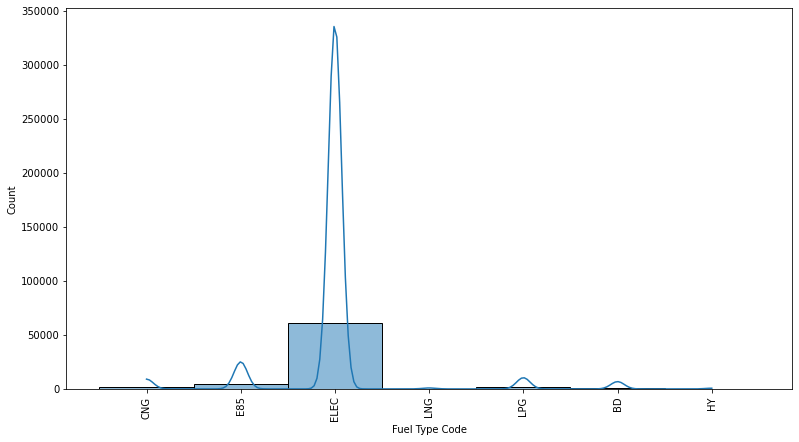

KeyboardInterrupt: 

In [62]:
import seaborn as sns

for i in data.columns:
 plt.figure(figsize=(13,7))
 sns.histplot(data = df[i], kde=True, multiple='stack')
 plt.xticks(rotation=90)
 plt.show()

# Importance of Features

This section will attempt to discover the importance of each feature in determining the pricing of charging an electric vehicle. Analyse the importance of features for predicting if charging the Electronic Vehicles is free at each particular charging station.

In [63]:
# Copy the data & perform train and test split
data1 = df.copy()
from sklearn.model_selection import train_test_split
Dtrain,Dtest = train_test_split(data1, test_size=0.3)

In [64]:
print('The shape of the training data:')
print(Dtrain.shape)
print('The shape of the test data:')
print(Dtest.shape)

The shape of the training data:
(49284, 65)
The shape of the test data:
(21122, 65)


In [65]:
# Logistic Regression Approach
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

lambda_val = 0.1
#Initialize the Logitic regression model with l2 penalty
lr = LogisticRegression(C=1/lambda_val, penalty='l2')
lr.fit(Dtrain[predictors], Dtrain[response])
y_predict = lr.predict(Dtest[predictors])

#Evaluate our model
model_acc = accuracy_score(y_predict, Dtest[response])
print("Model Accuracy is: {}".format(model_acc))

print("Model Coeff: {}".format(np.append(lr.intercept_, lr.coef_)))

NameError: name 'predictors' is not defined

In [ ]:
def runLRmodel(trials, data, predictors, label, penalty_type, penalty_score):

   model_acc     = 0
   model_weights = np.zeros([1,9])

   for i in range(0,trials):
      Dtrain, Dtest = train_test_split(data, test_size=0.3)
      lr = LogisticRegression(C=1/penalty_score, penalty=penalty_type, solver='liblinear')
      lr.fit(Dtrain[predictors], Dtrain[label])
      y_predict = lr.predict(Dtest[predictors])
      model_acc += accuracy_score(y_predict, Dtest[label])
      model_weights += np.append(lr.intercept_, lr.coef_)

   model_acc /= trials
   model_weights /= trials

   return np.round(model_acc, decimals=2), np.round(model_weights,decimals=2)

In [ ]:
lambda_vals = [.0001,.0003,.001,.003,.01,.03,.1,.3,1,3,5,10]
l2_acc = np.zeros(len(lambda_vals))
index = 0
#L2 regularization
for l in lambda_vals:
   l2_acc[index], w = runLRmodel(500,data1, predictors, 'class', 'l2', np.float(1))
   index += 1

print("Acc: {}".format(l2_acc))
# penalty at which validation accuracy is maximum
max_index_l2  = np.argmax(l2_acc)
best_lambda = lambda_vals[max_index_l2]
print("Best Lambda from L2: {}".format(best_lambda))

In [ ]:
alpha_vals = [.0001,.0003,.001,.003,.01,.03,.1,.3,1,3,5,10]
l1_acc = np.zeros(len(alpha_vals))
index = 0
#L2 regularization
for l in alpha_vals:
   l1_acc[index], w = runLRmodel(500,data1, predictors, 'class', 'l1', np.float(l))
   index += 1

print("Acc: {}".format(l1_acc))
# penalty at which validation accuracy is maximum
max_index_l1  = np.argmax(l1_acc)
best_alpha = alpha_vals[max_index_l1]
print("Best Alpha from L1: {}".format(best_alpha))